In [1]:
import pickle
import pytz
import utils
import elasticsearch
import settings
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import glob
import sys
import os

In [2]:
avg_over_min = 1

In [3]:
knn = pickle.load(open('knn_pickle_file_sonycAQ', 'rb'))

In [4]:
en_date = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
st_date = '2022-06-16T00:00:00'

en_date_dt = datetime.strptime(en_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.timezone('America/New_York'))
st_date_dt = datetime.strptime(st_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.timezone('America/New_York'))

st_date_utc = datetime.strptime(st_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.UTC).strftime('%Y-%m-%dT%H:%M:%SZ')
en_date_utc = datetime.strptime(en_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.UTC).strftime('%Y-%m-%dT%H:%M:%SZ')

In [5]:
weather_station_url = 'https://www.wunderground.com/dashboard/pws/KNYNEWYO589'
with open('stations.txt', 'w')as fp:
    fp.write(weather_station_url)

filePath = glob.glob('*.csv')
for i in filePath:
    if os.path.exists(i):
        os.remove(i)
py_path = sys.executable
os.system(py_path + ' weather_scraper.py --st_date %s --en_date %s' % (st_date_dt.date(), en_date_dt.date()))

https://www.wunderground.com/dashboard/pws/KNYNEWYO589

** Initializing binary search to find the first date with data **
low is 0 - 2022-06-16
high is 20 - 2022-07-06
mid is 10 - 2022-06-26
----//----
low is 0 - 2022-06-16
high is 9 - 2022-06-25
mid is 4 - 2022-06-20
----//----
low is 0 - 2022-06-16
high is 3 - 2022-06-19
mid is 1 - 2022-06-17
----//----
low is 0 - 2022-06-16
high is 0 - 2022-06-16
mid is 0 - 2022-06-16
----//----

First date not found!
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-16/2022-06-16/daily
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! pr

list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably 

list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably 

list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably 

list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably 

list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably 

0

In [6]:
df_weather = pd.read_csv(glob.glob('*.csv')[0])
df_weather['ts'] = pd.to_datetime(df_weather["Date"] + ' ' + df_weather['Time']).dt.tz_localize(tz='US/Eastern')
df_weather = df_weather.set_index('ts').resample('%iT' % avg_over_min).mean().fillna(method='ffill').fillna(method='bfill')
df_weather = df_weather.loc[st_date:en_date]
df_weather = df_weather.loc[st_date:en_date]
df_weather = df_weather[['Temperature_C', 'Humidity_%']]

In [7]:
df_weather

,Temperature_C,Humidity_%
ts,,
2022-06-16 00:04:00-04:00,19.61,80.0
2022-06-16 00:05:00-04:00,19.61,80.0
2022-06-16 00:06:00-04:00,19.61,80.0
2022-06-16 00:07:00-04:00,19.61,80.0
2022-06-16 00:08:00-04:00,19.61,80.0
...,...,...
2022-07-06 17:05:00-04:00,29.89,52.0
2022-07-06 17:06:00-04:00,29.89,52.0
2022-07-06 17:07:00-04:00,29.89,52.0


In [8]:
es = elasticsearch.Elasticsearch('https://es.master1.sonycproject.com', http_auth=('elastic', settings.es_password))

In [9]:
sensor_list = ['sonycnode-dca632ceb490', 'sonycnode-dca632ceb547', 'sonycnode-dca632ceb529', 'sonycnode-dca632ceb559', 'sonycnode-dca632ceb48d']


In [10]:
praxis_df = utils.praxis_data_download(st_date_utc, en_date_utc, avg_over_min)

In [11]:
praxis_df = praxis_df.loc[st_date:en_date]

In [12]:
praxis_df

,praxis_pm1_vals,praxis_pm2p5_vals,praxis_pm10_vals,praxis_pm1_vals_adj,praxis_pm2p5_vals_adj,praxis_pm10_vals_adj
ts,,,,,,
2022-06-16 00:01:00-04:00,0.8,4.1,10.1,2.2,4.0,12.4
2022-06-16 00:02:00-04:00,0.7,3.7,12.4,2.2,3.7,13.0
2022-06-16 00:03:00-04:00,0.7,4.3,16.2,1.8,3.7,13.4
2022-06-16 00:04:00-04:00,0.7,4.0,18.6,1.6,3.5,16.1
2022-06-16 00:05:00-04:00,0.6,3.1,12.1,1.9,3.6,13.9
...,...,...,...,...,...,...
2022-07-05 17:17:00-04:00,2.3,7.5,19.7,7.8,9.8,20.1
2022-07-05 17:18:00-04:00,2.4,7.6,20.6,8.0,9.8,19.5
2022-07-05 17:19:00-04:00,2.3,7.4,20.5,8.1,10.5,23.1


{'query': {'bool': {'must': [{'term': {'fqdn.keyword': 'sonycnode-dca632ceb490'}}, {'range': {'time': {'gte': '2022-06-16T04:00:00Z', 'lte': '2022-07-06T21:10:30Z'}}}]}}}


0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T12:50:37.228188 - 2022-06-20T20:01:47.924448
1. n hits: 1000. 2022-06-20T19:55:02.853335 - 2022-06-21T03:38:18.807038
2. n hits: 1000. 2022-06-21T02:42:43.138290 - 2022-06-21T05:13:45.033333
3. n hits: 1000. 2022-06-21T04:05:19.183191 - 2022-06-21T11:59:40.414287
4. n hits: 1000. 2022-06-21T10:46:49.468225 - 2022-06-21T13:07:16.277884
5. n hits: 1000. 2022-06-21T05:18:30.109234 - 2022-06-21T13:08:01.305772
6. n hits: 1000. 2022-06-21T05:18:40.091211 - 2022-06-21T14:45:02.698103
7. n hits: 1000. 2022-06-21T06:26:00.972548 - 2022-06-21T14:06:07.166140
8. n hits: 1000. 2022-06-21T07:52:52.275380 - 2022-06-22T06:26:54.896855
9. n hits: 1000. 2022-06-21T16:19:43.809855 - 2022-06-22T06:27:14.909321
10. n hits: 1000. 2022-06-21T22:33:03.690924 - 2022-06-22T07:40:55.892003
11. n hits: 1000. 2022-06-22T06:26:59.919605 - 2022-06-22T08:45:51.693846
12. n hits: 1000. 2022-06-22T07:41:20.866438 - 2022-06-22T09:49:42.552802
13. n hits: 1000. 2022-06-22T09:43:42.446906 - 2

111. n hits: 1000. 2022-06-17T01:13:02.823599 - 2022-06-17T02:44:28.885123
112. n hits: 1000. 2022-06-16T19:53:28.612392 - 2022-06-17T04:44:25.405594
113. n hits: 1000. 2022-06-17T04:29:45.271476 - 2022-06-23T17:55:37.860627
114. n hits: 1000. 2022-06-23T12:07:33.345941 - 2022-06-23T18:19:43.201694
115. n hits: 1000. 2022-06-23T12:07:28.315669 - 2022-06-23T19:20:28.962808
116. n hits: 1000. 2022-06-23T13:10:24.097769 - 2022-06-23T20:14:54.856963
117. n hits: 1000. 2022-06-23T13:10:14.121592 - 2022-06-23T21:03:20.440176
118. n hits: 1000. 2022-06-23T14:05:09.767266 - 2022-06-23T21:03:25.448584
119. n hits: 1000. 2022-06-22T04:13:18.114824 - 2022-06-23T21:44:50.974424
120. n hits: 1000. 2022-06-21T21:51:43.264754 - 2022-06-24T01:25:08.840483
121. n hits: 1000. 2022-06-24T00:25:43.118253 - 2022-06-24T18:09:52.031866
122. n hits: 1000. 2022-06-24T17:19:06.405981 - 2022-06-24T19:11:37.905681
123. n hits: 1000. 2022-06-24T16:03:05.396382 - 2022-06-24T23:21:26.172316
124. n hits: 1000. 2022-0

221. n hits: 1000. 2022-06-30T23:03:42.492908 - 2022-07-01T01:16:34.287207
222. n hits: 1000. 2022-06-27T22:50:42.364837 - 2022-07-01T02:20:50.207256
223. n hits: 1000. 2022-06-27T22:50:47.359833 - 2022-06-28T06:56:33.782456
224. n hits: 1000. 2022-06-28T05:55:52.947923 - 2022-06-28T08:51:25.295954
225. n hits: 1000. 2022-06-27T23:53:08.166153 - 2022-06-28T07:53:49.490927
226. n hits: 1000. 2022-06-27T23:53:18.135087 - 2022-06-28T09:41:30.943521
227. n hits: 1000. 2022-06-27T20:06:10.188586 - 2022-06-28T10:21:36.504615
228. n hits: 1000. 2022-06-27T20:11:45.230840 - 2022-06-30T15:54:40.869079
229. n hits: 1000. 2022-06-30T14:58:15.051257 - 2022-06-30T19:25:19.228892
230. n hits: 1000. 2022-06-30T15:55:15.897914 - 2022-06-30T19:25:29.214211
231. n hits: 1000. 2022-06-30T16:52:46.929013 - 2022-06-30T20:52:20.352446
232. n hits: 1000. 2022-06-29T21:35:29.693115 - 2022-06-30T21:00:15.465977
233. n hits: 1000. 2022-06-29T21:38:09.741848 - 2022-06-30T05:55:32.447814
234. n hits: 1000. 2022-0

331. n hits: 1000. 2022-07-05T19:17:45.212734 - 2022-07-06T03:27:02.376934
332. n hits: 1000. 2022-07-05T20:14:56.000914 - 2022-07-05T21:55:27.589516
333. n hits: 1000. 2022-07-05T21:07:01.843486 - 2022-07-06T04:16:28.137980
334. n hits: 1000. 2022-07-05T21:55:57.596443 - 2022-07-06T04:58:18.728986
335. n hits: 1000. 2022-07-05T22:36:43.144499 - 2022-07-06T07:44:01.201210
336. n hits: 1000. 2022-07-06T06:32:30.116287 - 2022-07-06T13:55:36.847170
337. n hits: 1000. 2022-07-06T07:45:01.198803 - 2022-07-06T14:58:22.710002
338. n hits: 1000. 2022-07-06T07:44:06.255662 - 2022-07-06T09:46:18.211038
339. n hits: 1000. 2022-07-06T08:48:52.356572 - 2022-07-06T15:52:28.478510
340. n hits: 1000. 2022-07-06T09:46:43.228402 - 2022-07-06T16:39:44.154788
341. n hits: 1000. 2022-07-06T10:36:33.943850 - 2022-07-06T17:20:24.779263
342. n hits: 1000. 2022-07-06T10:36:54.024998 - 2022-07-06T18:49:26.042058
343. n hits: 1000. 2022-07-06T17:54:35.241778 - 2022-07-06T20:10:47.274299
344. n hits: 1000. 2022-0

0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T12:50:36.295256 - 2022-06-20T20:00:26.980752
1. n hits: 1000. 2022-06-20T19:55:01.945815 - 2022-06-21T03:41:43.013556
2. n hits: 1000. 2022-06-21T02:42:47.272218 - 2022-06-21T05:17:34.265557
3. n hits: 1000. 2022-06-21T04:05:18.362890 - 2022-06-21T11:59:39.496837
4. n hits: 1000. 2022-06-21T10:46:53.491395 - 2022-06-21T13:07:11.671657
5. n hits: 1000. 2022-06-21T05:18:34.246189 - 2022-06-21T13:08:01.457756
6. n hits: 1000. 2022-06-21T05:18:29.242673 - 2022-06-21T14:44:59.180976
7. n hits: 1000. 2022-06-21T06:26:15.054969 - 2022-06-21T14:06:07.964373
8. n hits: 1000. 2022-06-21T07:58:56.176220 - 2022-06-22T06:26:54.340675
9. n hits: 1000. 2022-06-21T16:19:45.916983 - 2022-06-22T06:27:14.573378
10. n hits: 1000. 2022-06-21T22:33:04.234073 - 2022-06-22T07:40:55.934126
11. n hits: 1000. 2022-06-22T06:26:59.603447 - 2022-06-22T08:45:47.164151
12. n hits: 1000. 2022-06-22T07:41:20.906687 - 2022-06-22T09:55:23.844997
13. n hits: 1000. 2022-06-22T09:43:48.364777 - 2

111. n hits: 1000. 2022-06-17T00:14:33.361291 - 2022-06-17T02:02:55.165292
112. n hits: 1000. 2022-06-16T19:53:28.062947 - 2022-06-17T03:18:56.422958
113. n hits: 1000. 2022-06-16T19:57:08.128979 - 2022-06-23T12:07:20.409658
114. n hits: 1000. 2022-06-23T10:56:23.764820 - 2022-06-23T18:19:41.829809
115. n hits: 1000. 2022-06-23T12:07:30.588851 - 2022-06-23T18:19:01.663231
116. n hits: 1000. 2022-06-23T12:33:15.883357 - 2022-06-23T20:14:49.036792
117. n hits: 1000. 2022-06-23T13:10:21.649038 - 2022-06-23T20:15:04.041704
118. n hits: 1000. 2022-06-23T13:11:16.619878 - 2022-06-23T21:03:25.005287
119. n hits: 1000. 2022-06-23T14:05:07.669694 - 2022-06-23T21:44:35.875489
120. n hits: 1000. 2022-06-22T04:13:21.796252 - 2022-06-23T21:44:46.057972
121. n hits: 1000. 2022-06-21T21:51:43.362469 - 2022-06-24T01:26:25.437664
122. n hits: 1000. 2022-06-24T00:26:24.062559 - 2022-06-24T18:16:11.490251
123. n hits: 1000. 2022-06-24T16:03:24.688952 - 2022-06-24T19:11:47.343397
124. n hits: 1000. 2022-0

221. n hits: 1000. 2022-06-30T23:03:25.322164 - 2022-07-01T00:38:22.234321
222. n hits: 1000. 2022-07-01T00:29:22.093983 - 2022-07-01T02:06:09.790196
223. n hits: 1000. 2022-06-27T22:50:45.273456 - 2022-07-01T02:20:50.303689
224. n hits: 1000. 2022-06-28T05:55:01.456816 - 2022-06-28T08:50:38.676897
225. n hits: 1000. 2022-06-28T06:56:47.210493 - 2022-06-28T08:51:23.670851
226. n hits: 1000. 2022-06-27T23:53:16.260776 - 2022-06-28T09:40:29.288271
227. n hits: 1000. 2022-06-28T00:47:16.994307 - 2022-06-28T10:21:04.883622
228. n hits: 1000. 2022-06-27T20:06:07.709068 - 2022-06-28T10:21:29.916327
229. n hits: 1000. 2022-06-28T01:58:58.255839 - 2022-06-30T16:37:15.892732
230. n hits: 1000. 2022-06-30T15:55:10.335529 - 2022-06-30T19:25:24.943223
231. n hits: 1000. 2022-06-30T16:37:25.872382 - 2022-06-30T20:26:06.353625
232. n hits: 1000. 2022-06-29T21:35:54.986939 - 2022-06-30T20:59:42.142417
233. n hits: 1000. 2022-06-29T21:35:29.953782 - 2022-06-29T23:51:37.077817
234. n hits: 1000. 2022-0

0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-18T06:22:42.911937 - 2022-06-18T07:55:04.168273
1. n hits: 1000. 2022-06-18T06:31:28.051941 - 2022-06-18T15:44:35.304581
2. n hits: 1000. 2022-06-18T14:21:49.215140 - 2022-06-18T16:58:41.266394
3. n hits: 1000. 2022-06-18T07:55:14.222109 - 2022-06-18T17:18:01.644087
4. n hits: 1000. 2022-06-18T09:16:25.228684 - 2022-06-18T18:06:27.167138
5. n hits: 1000. 2022-06-18T09:15:45.200593 - 2022-06-18T11:29:22.065483
6. n hits: 1000. 2022-06-18T10:26:31.186260 - 2022-06-18T19:02:32.855675
7. n hits: 1000. 2022-06-18T11:29:57.022819 - 2022-06-18T19:52:23.554186
8. n hits: 1000. 2022-06-18T11:29:52.028147 - 2022-06-18T23:12:16.239711
9. n hits: 1000. 2022-06-18T21:52:25.171131 - 2022-06-19T00:29:02.283046
10. n hits: 1000. 2022-06-18T23:12:26.263225 - 2022-06-19T06:43:22.204920
11. n hits: 1000. 2022-06-19T00:29:37.307311 - 2022-06-19T06:43:27.218701
12. n hits: 1000. 2022-06-19T01:33:48.097308 - 2022-06-19T08:38:43.707479
13. n hits: 1000. 2022-06-19T05:22:11.139349 - 2

111. n hits: 1000. 2022-06-24T03:19:24.219799 - 2022-06-24T10:40:15.120023
112. n hits: 1000. 2022-06-24T03:19:39.276160 - 2022-06-24T05:14:40.744901
113. n hits: 1000. 2022-06-24T04:39:55.227685 - 2022-06-24T11:36:00.914123
114. n hits: 1000. 2022-06-24T05:15:15.733691 - 2022-06-24T12:23:56.481653
115. n hits: 1000. 2022-06-24T00:43:42.218379 - 2022-06-24T13:06:22.106132
116. n hits: 1000. 2022-06-23T18:34:42.369401 - 2022-06-24T07:19:17.331247
117. n hits: 1000. 2022-06-23T19:07:42.805976 - 2022-06-24T07:46:17.748370
118. n hits: 1000. 2022-06-23T19:21:02.975652 - 2022-06-24T17:35:00.535167
119. n hits: 1000. 2022-06-24T16:07:04.324063 - 2022-06-25T11:01:34.048196
120. n hits: 1000. 2022-06-25T08:36:02.152134 - 2022-06-25T11:01:54.077321
121. n hits: 1000. 2022-06-25T08:36:27.164224 - 2022-06-25T12:04:59.929447
122. n hits: 1000. 2022-06-25T11:02:24.087181 - 2022-06-25T13:46:56.368494
123. n hits: 1000. 2022-06-25T13:00:40.712990 - 2022-06-25T14:47:27.133744
124. n hits: 1000. 2022-0

221. n hits: 1000. 2022-06-28T21:36:23.972814 - 2022-06-29T06:39:46.378361
222. n hits: 1000. 2022-06-28T22:25:44.596178 - 2022-06-29T06:40:06.333568
223. n hits: 1000. 2022-06-28T18:11:41.317378 - 2022-06-29T07:37:22.067513
224. n hits: 1000. 2022-06-28T23:42:00.693673 - 2022-06-30T08:50:57.130674
225. n hits: 1000. 2022-06-29T20:07:42.232809 - 2022-06-30T08:51:07.099926
226. n hits: 1000. 2022-06-30T01:36:11.390732 - 2022-06-30T09:25:02.548008
227. n hits: 1000. 2022-06-30T02:20:56.930609 - 2022-06-30T10:18:48.185016
228. n hits: 1000. 2022-06-30T09:50:47.844762 - 2022-07-01T00:45:09.615373
229. n hits: 1000. 2022-06-30T10:20:28.226616 - 2022-07-01T01:15:09.975663
230. n hits: 1000. 2022-06-29T20:38:47.596973 - 2022-07-01T01:49:10.466609
231. n hits: 1000. 2022-06-29T07:58:52.431235 - 2022-06-29T21:30:33.282330
232. n hits: 1000. 2022-06-29T00:08:06.044557 - 2022-06-29T21:20:03.170705
233. n hits: 1000. 2022-06-29T00:50:36.615139 - 2022-06-30T23:54:28.926087
234. n hits: 1000. 2022-0

331. n hits: 573. 2022-07-06T19:40:52.497293 - 2022-07-06T21:10:28.764584
331573
331573
331573
331573
331573
331573
331573
331573
331573
331573
331573
331573
{'query': {'bool': {'must': [{'term': {'fqdn.keyword': 'sonycnode-dca632ceb559'}}, {'range': {'time': {'gte': '2022-06-16T04:00:00Z', 'lte': '2022-07-06T21:10:30Z'}}}]}}}


0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T13:36:09.766275 - 2022-06-20T21:13:26.175203
1. n hits: 1000. 2022-06-20T19:55:05.150748 - 2022-06-21T04:05:16.387774
2. n hits: 1000. 2022-06-21T02:42:45.287089 - 2022-06-21T05:18:22.331869
3. n hits: 1000. 2022-06-21T04:05:41.367260 - 2022-06-21T11:59:37.311762
4. n hits: 1000. 2022-06-21T05:18:37.311545 - 2022-06-21T13:08:08.099065
5. n hits: 1000. 2022-06-21T05:18:32.361303 - 2022-06-21T14:44:34.337121
6. n hits: 1000. 2022-06-21T06:26:03.211120 - 2022-06-21T14:44:59.338355
7. n hits: 1000. 2022-06-21T06:34:48.227993 - 2022-06-21T17:28:11.366539
8. n hits: 1000. 2022-06-21T16:20:10.540632 - 2022-06-21T23:46:36.068191
9. n hits: 1000. 2022-06-20T14:13:00.827865 - 2022-06-21T23:45:21.096796
10. n hits: 1000. 2022-06-20T21:13:31.175789 - 2022-06-20T23:23:42.772588
11. n hits: 1000. 2022-06-20T15:22:56.738298 - 2022-06-20T23:23:52.698004
12. n hits: 1000. 2022-06-20T15:24:11.778833 - 2022-06-21T00:18:28.481285
13. n hits: 1000. 2022-06-20T16:25:12.495322 - 2

111. n hits: 1000. 2022-06-26T17:47:15.488667 - 2022-06-26T19:56:02.177362
112. n hits: 1000. 2022-06-26T13:16:36.851798 - 2022-06-26T20:58:32.931061
113. n hits: 1000. 2022-06-26T20:24:32.507349 - 2022-06-27T13:46:41.333302
114. n hits: 1000. 2022-06-27T12:50:40.637214 - 2022-06-27T15:58:12.995772
115. n hits: 1000. 2022-06-27T14:59:02.328059 - 2022-06-27T16:55:58.743191
116. n hits: 1000. 2022-06-27T16:01:43.044933 - 2022-06-27T18:23:25.112608
117. n hits: 1000. 2022-06-27T17:43:59.563692 - 2022-06-27T19:30:56.016631
118. n hits: 1000. 2022-06-26T23:42:10.087370 - 2022-06-27T20:06:01.476884
119. n hits: 1000. 2022-06-26T06:03:21.084385 - 2022-06-27T04:18:18.804874
120. n hits: 1000. 2022-06-27T00:44:45.998560 - 2022-06-27T04:35:14.022725
121. n hits: 1000. 2022-06-27T01:40:31.724150 - 2022-06-27T04:42:54.104134
122. n hits: 1000. 2022-06-26T20:58:38.024199 - 2022-06-27T05:06:54.439678
123. n hits: 1000. 2022-06-25T17:26:50.941994 - 2022-06-27T05:43:44.925169
124. n hits: 1000. 2022-0

221. n hits: 1000. 2022-07-04T07:51:30.049468 - 2022-07-05T11:01:56.803135
222. n hits: 1000. 2022-07-04T23:20:37.323200 - 2022-07-05T13:29:48.706960
223. n hits: 1000. 2022-07-05T12:23:57.913876 - 2022-07-05T14:26:19.485116
224. n hits: 1000. 2022-07-05T13:30:13.702095 - 2022-07-05T16:01:25.793215
225. n hits: 1000. 2022-07-05T15:18:10.251869 - 2022-07-05T17:09:31.757817
226. n hits: 1000. 2022-07-03T21:51:22.032769 - 2022-07-05T18:02:52.414482
227. n hits: 1000. 2022-07-03T21:51:32.020135 - 2022-07-03T23:36:18.531270
228. n hits: 1000. 2022-07-03T21:52:17.036144 - 2022-07-04T04:27:07.391185
229. n hits: 1000. 2022-07-03T23:36:38.522122 - 2022-07-04T05:51:23.569240
230. n hits: 1000. 2022-07-04T00:21:34.231264 - 2022-07-04T06:47:24.234494
231. n hits: 1000. 2022-07-03T20:34:21.004833 - 2022-07-04T19:59:44.742721
232. n hits: 1000. 2022-07-04T19:08:24.085784 - 2022-07-04T20:52:15.436229
233. n hits: 1000. 2022-07-04T15:12:35.906576 - 2022-07-04T21:40:21.009565
234. n hits: 1000. 2022-0

0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T12:50:36.099659 - 2022-06-20T19:58:13.813232
1. n hits: 1000. 2022-06-20T19:55:03.844484 - 2022-06-21T03:38:17.296945
2. n hits: 1000. 2022-06-21T02:42:46.029198 - 2022-06-21T05:07:33.622963
3. n hits: 1000. 2022-06-21T04:05:37.628695 - 2022-06-21T11:59:39.832264
4. n hits: 1000. 2022-06-21T10:46:48.691182 - 2022-06-21T13:07:11.114844
5. n hits: 1000. 2022-06-21T05:18:33.960246 - 2022-06-21T13:08:06.301924
6. n hits: 1000. 2022-06-21T05:18:28.791744 - 2022-06-21T14:45:02.938252
7. n hits: 1000. 2022-06-21T06:26:19.924514 - 2022-06-21T14:06:12.160106
8. n hits: 1000. 2022-06-21T07:52:51.214096 - 2022-06-22T06:26:54.052804
9. n hits: 1000. 2022-06-21T16:19:44.606765 - 2022-06-22T06:27:14.100410
10. n hits: 1000. 2022-06-21T22:33:01.875180 - 2022-06-22T07:40:55.064248
11. n hits: 1000. 2022-06-22T06:26:59.075844 - 2022-06-22T08:45:50.970316
12. n hits: 1000. 2022-06-22T07:41:15.110560 - 2022-06-22T09:43:36.864395
13. n hits: 1000. 2022-06-22T09:42:51.771552 - 2

111. n hits: 1000. 2022-06-17T02:45:42.576860 - 2022-06-23T12:07:19.227498
112. n hits: 1000. 2022-06-23T10:56:23.192775 - 2022-06-23T18:19:45.459946
113. n hits: 1000. 2022-06-23T12:07:29.160707 - 2022-06-23T18:19:00.690200
114. n hits: 1000. 2022-06-23T12:32:24.579341 - 2022-06-23T20:14:47.536528
115. n hits: 1000. 2022-06-23T13:10:10.234533 - 2022-06-23T20:15:07.738088
116. n hits: 1000. 2022-06-23T13:11:15.238707 - 2022-06-23T21:03:28.390601
117. n hits: 1000. 2022-06-23T14:05:21.128800 - 2022-06-23T21:44:33.978726
118. n hits: 1000. 2022-06-22T04:13:22.021382 - 2022-06-23T21:44:54.036113
119. n hits: 1000. 2022-06-21T21:51:46.068490 - 2022-06-24T01:26:27.398133
120. n hits: 1000. 2022-06-24T00:26:21.449086 - 2022-06-24T18:10:21.785738
121. n hits: 1000. 2022-06-24T16:03:14.692147 - 2022-06-24T19:11:42.818153
122. n hits: 1000. 2022-06-24T16:03:04.668085 - 2022-06-24T23:22:36.725628
123. n hits: 1000. 2022-06-24T21:56:55.343463 - 2022-06-25T00:26:07.948587
124. n hits: 1000. 2022-0

221. n hits: 1000. 2022-06-27T22:50:41.542693 - 2022-07-01T02:20:49.469183
222. n hits: 1000. 2022-06-27T22:53:46.287174 - 2022-06-28T08:50:05.730343
223. n hits: 1000. 2022-06-28T06:56:39.273062 - 2022-06-28T08:51:25.746385
224. n hits: 1000. 2022-06-27T23:53:12.834939 - 2022-06-28T09:39:56.727410
225. n hits: 1000. 2022-06-28T00:47:18.558349 - 2022-06-28T09:41:31.426480
226. n hits: 1000. 2022-06-27T20:06:03.402807 - 2022-06-28T10:21:32.041551
227. n hits: 1000. 2022-06-28T01:34:34.528130 - 2022-06-30T16:28:04.108858
228. n hits: 1000. 2022-06-30T15:55:13.373638 - 2022-06-30T19:25:27.086335
229. n hits: 1000. 2022-06-30T16:30:24.005595 - 2022-06-30T19:58:17.699115
230. n hits: 1000. 2022-06-30T04:20:01.558095 - 2022-06-30T21:00:48.790228
231. n hits: 1000. 2022-06-29T21:35:29.582475 - 2022-06-30T05:02:42.244400
232. n hits: 1000. 2022-06-29T22:59:05.977760 - 2022-06-30T05:55:42.873774
233. n hits: 1000. 2022-06-28T21:56:03.252145 - 2022-06-30T06:37:48.618718
234. n hits: 1000. 2022-0

332. n hits: 1000. 2022-07-05T21:55:32.332101 - 2022-07-06T04:58:09.785968
333. n hits: 1000. 2022-07-05T22:36:28.047412 - 2022-07-06T05:32:35.401821
334. n hits: 1000. 2022-07-06T05:03:24.882235 - 2022-07-06T13:26:08.563950
335. n hits: 1000. 2022-07-06T12:43:57.731583 - 2022-07-06T14:58:05.799313
336. n hits: 1000. 2022-07-06T07:44:42.579794 - 2022-07-06T14:58:15.444513
337. n hits: 1000. 2022-07-06T07:44:12.655884 - 2022-07-06T09:46:29.558405
338. n hits: 1000. 2022-07-06T09:36:24.457025 - 2022-07-06T15:52:36.590138
339. n hits: 1000. 2022-07-06T09:46:44.575584 - 2022-07-06T17:19:38.387101
340. n hits: 1000. 2022-07-06T10:36:25.440747 - 2022-07-06T18:43:40.245010
341. n hits: 1000. 2022-07-06T17:20:28.325777 - 2022-07-06T18:49:30.436358
342. n hits: 1000. 2022-07-06T18:37:20.167969 - 2022-07-06T20:17:17.336490
343. n hits: 702. 2022-07-06T20:10:57.151689 - 2022-07-06T21:10:28.472080
343702
343702
343702
343702
343702
343702
343702
343702
343702
343702
343702
343702


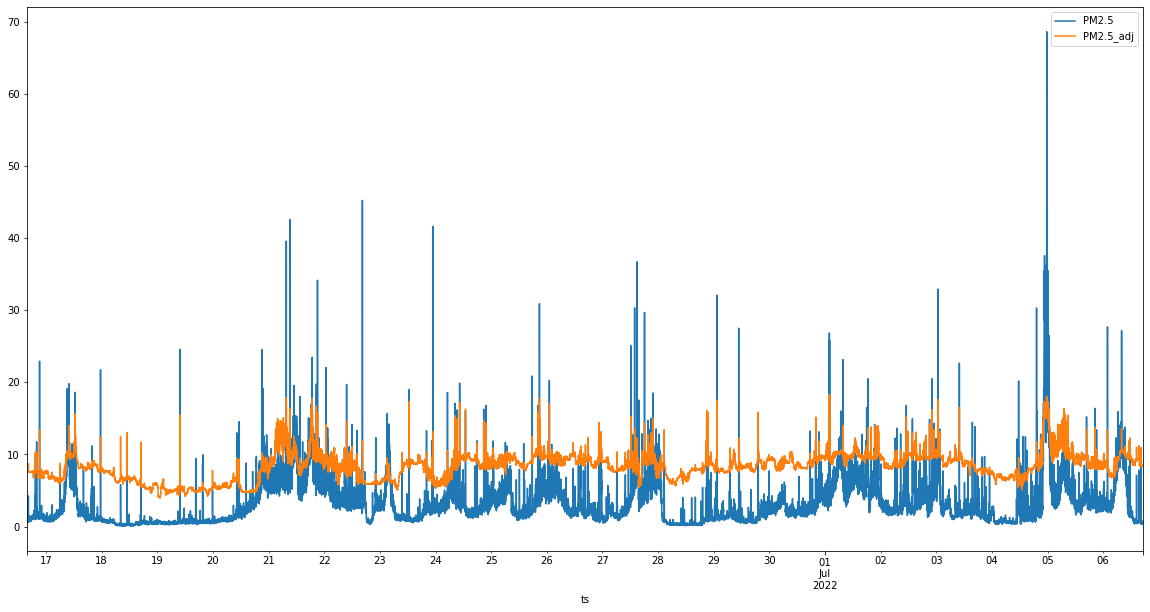

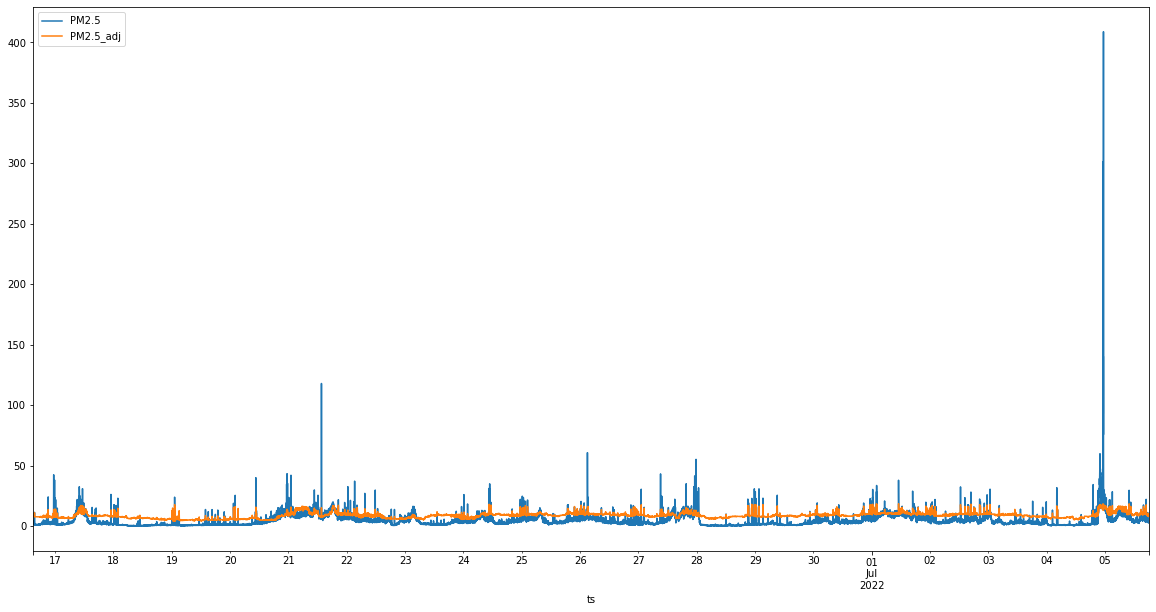

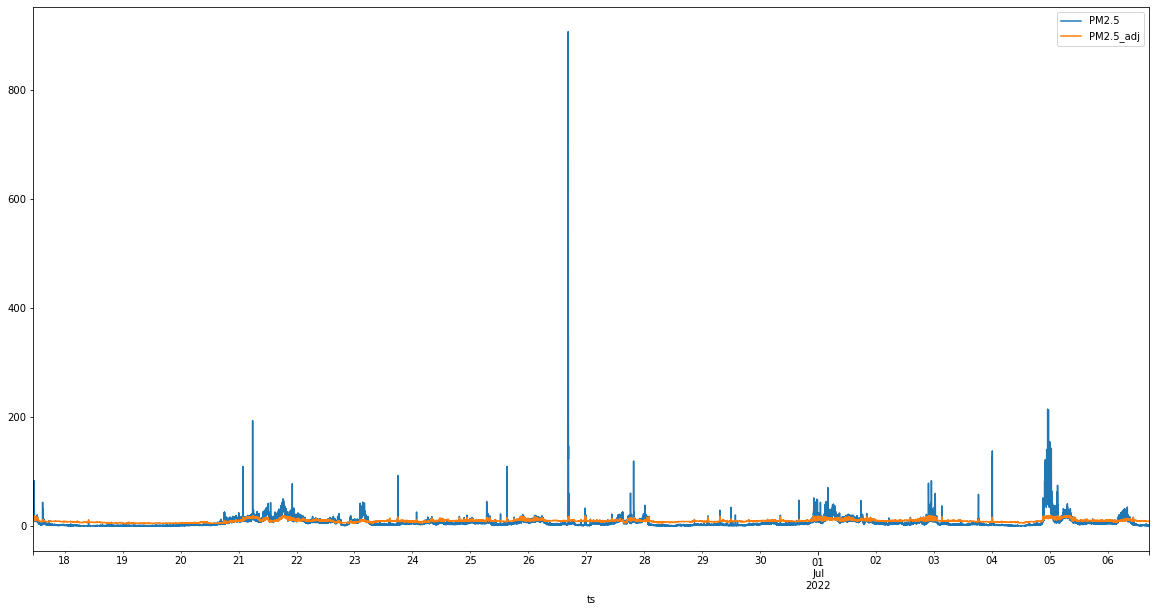

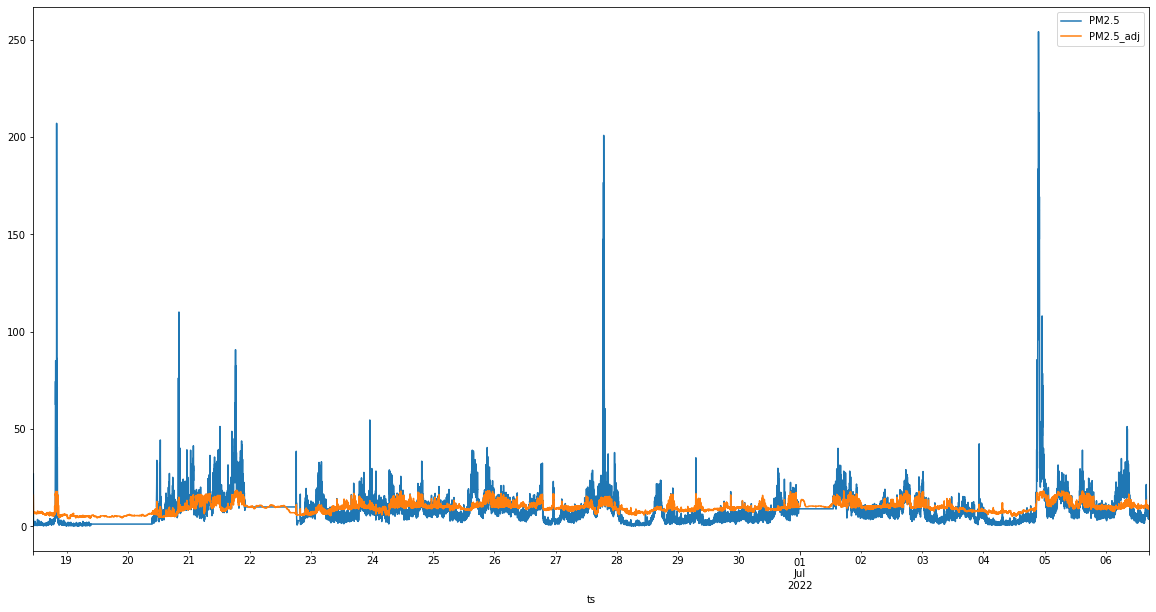

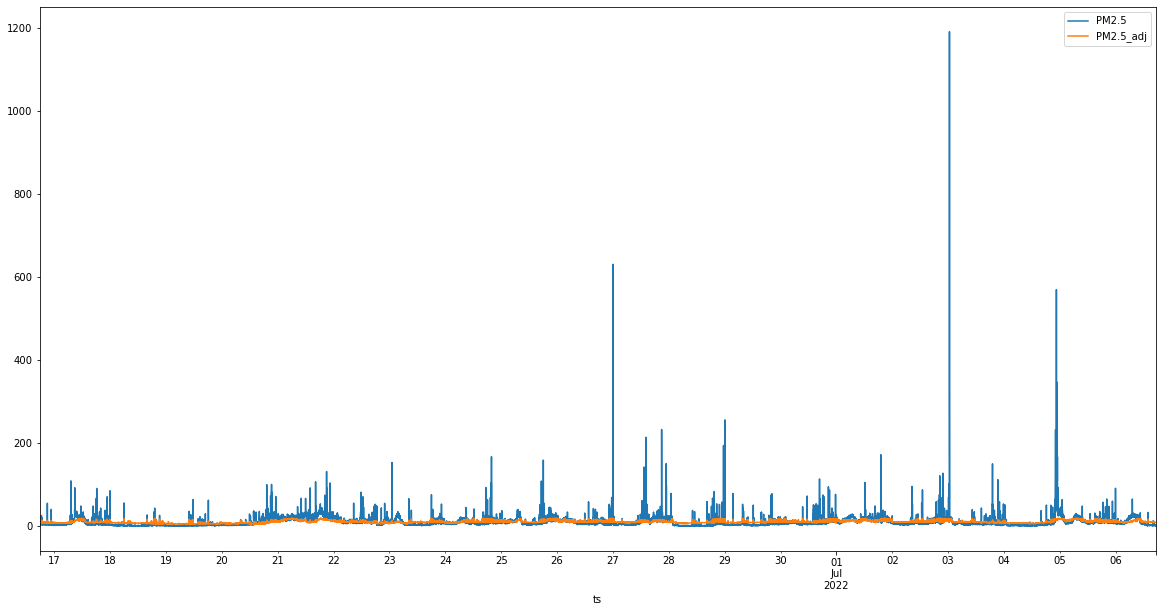

In [13]:
# sensor_list = ['sonycnode-dca632ceb490']
for fqdn in sensor_list:
    
#     if os.path.exists('%s.csv' % fqdn):
#         continue
    
    ss = utils.download_sensor_data(es, 'status', 'fqdn', fqdn, start=st_date_utc, end=en_date_utc, save=False)
    data = {}
    
    aq_data = [ele['aq'] if 'aq' in ele else None for ele in ss]
    data['ts'] = [ele['dt'] if ele != None else None for ele in aq_data]
    
    data['laeq'] = [ele['laeq'] if 'laeq' in ele else None for ele in ss]
    data['lceq'] = [ele['lceq'] if 'lceq' in ele else None for ele in ss]
    data['lzeq'] = [ele['lzeq'] if 'lzeq' in ele else None for ele in ss]
    
    data['PM1.0'] = [ele['PM1.0'] if ele != None else None for ele in aq_data]
    data['PM2.5'] = [ele['PM2.5'] if ele != None else None for ele in aq_data]
    data['PM10'] = [ele['PM10'] if ele != None else None for ele in aq_data]
    
    data['engine'] = [ele['classification']['engine'] if 'classification' in ele else None for ele in ss]
    data['machinery_impact'] = [ele['classification']['machinery_impact'] if 'classification' in ele else None for ele in ss]
    data['non_machinery_impact'] = [ele['classification']['non_machinery_impact'] if 'classification' in ele else None for ele in ss if 'classification' in ele]
    data['powered_saw'] = [ele['classification']['powered_saw'] if 'classification' in ele else None for ele in ss]
    data['human_voice'] = [ele['classification']['human_voice'] if 'classification' in ele else None for ele in ss]
    
    print(len(data['ts']))
    print(len(data['laeq']))
    print(len(data['lceq']))
    print(len(data['lzeq']))
    print(len(data['PM1.0']))
    print(len(data['PM2.5']))
    print(len(data['PM10']))
    print(len(data['engine']))
    print(len(data['machinery_impact']))
    print(len(data['non_machinery_impact']))
    print(len(data['powered_saw']))
    print(len(data['human_voice']))
    
    main_df = pd.DataFrame.from_dict(data, orient='index').transpose()
#     break
#     data['ts'] = pd.to_datetime([datetime.fromtimestamp(int(ele['aq']['dt'])) if 'aq' in ele and 'dt' in ele else None for ele in ss ]).tz_localize(tz='US/Eastern')
    
#     data['laeq'] = [ele['laeq'] if 'laeq' in ele else None for ele in ss]
#     data['lceq'] = [ele['lceq'] if 'lceq' in ele else None for ele in ss]
#     data['lzeq'] = [ele['lzeq'] if 'lzeq' in ele else None for ele in ss]

#     data['PM1.0'] = [ele['aq']['PM1.0'] if 'aq' in ele and 'PM1.0' in ele else None for ele in ss]
#     data['PM2.5'] = [ele['aq']['PM2.5'] if 'aq' in ele and 'PM2.5' in ele else None for ele in ss]
#     data['PM10'] = [ele['aq']['PM10'] if 'aq' in ele and 'PM10' in ele else None for ele in ss]

#     data['engine'] = [ele['classification']['engine'] if 'classification' in ele else None for ele in ss]
#     data['machinery_impact'] = [ele['classification']['machinery_impact'] if 'classification' in ele else None for ele in ss]
#     data['non_machinery_impact'] = [ele['classification']['non_machinery_impact'] if 'classification' in ele else None for ele in ss if 'classification' in ele]
#     data['powered_saw'] = [ele['classification']['powered_saw'] if 'classification' in ele else None for ele in ss]
#     data['human_voice'] = [ele['classification']['human_voice'] if 'classification' in ele else None for ele in ss]
    
#     main_df = pd.DataFrame(data)
    main_df = main_df.sort_values('ts')
    main_df = main_df.fillna(method='ffill').fillna(method='bfill')
    main_df['ts'] = pd.to_datetime(main_df['ts'], unit='s').dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
   
    
    main_df = main_df.set_index('ts').resample('%iT' % avg_over_min).mean()
    main_df = main_df.fillna(method='ffill').fillna(method='bfill')
    main_df = main_df[str(df_weather.index[0]):str(df_weather.index[-1])]
    
    main_df = main_df.join(praxis_df)
    
    main_df[['temp_c', 'rel_humid']] = df_weather[['Temperature_C', 'Humidity_%']]
    
    knn_input_df = main_df[['PM2.5', 'temp_c', 'rel_humid']].rename(columns={'PM2.5': 'Sensor_O1', 'temp_c': 'Temp', 'rel_humid': 'RelHum'})
    main_df['PM2.5_adj'] = knn.predict(knn_input_df)
    
    main_df['us_epa_aqi_adj'] = main_df['PM2.5_adj'].apply(utils.calculate_us_epa_aqi)
    main_df['us_epa_aqi_raw'] = main_df['PM2.5'].apply(utils.calculate_us_epa_aqi)
    
    main_df.round(4).to_csv('%s.csv' % fqdn)
    
    main_df[['PM2.5', 'PM2.5_adj']].plot(figsize=(20, 10))
    
    